In [9]:
import fooof as f
import numpy as np
import scipy.io as scio
import scipy.signal as scs


def load_data(filename):
    """
    Loads a single matrix from a given .mat file
    :param filename: The full path to the .mat file to load
    :return: np.array with the saved matrix in the .mat file
    """
    return scio.loadmat(filename)['data']

seg1 = load_data("segment1.mat")
FS = 5000  # required for generalized nfft argument
NUM_SECS = 1.5

#### calculate PSD

In [10]:
freqs, psd = scs.welch(seg1, FS, "hamming", nperseg=2500, detrend=False, nfft=int(FS * NUM_SECS))
psd = np.squeeze(psd)  # required to remove redundant axis

#### create FOOOF object, fit to data

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 0.67 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.5788, 1.9613                                          
                                                                                                  
                                       3 peaks were found:                                        
          

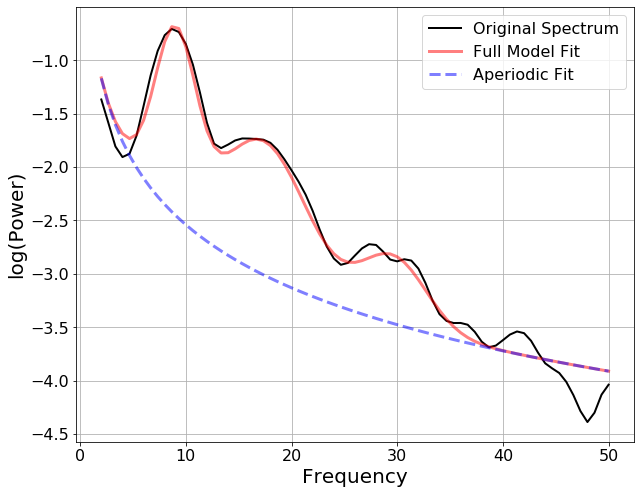

In [11]:
fooof: f.FOOOF = f.FOOOF(peak_width_limits=[1.5, 12])
fooof.add_data(freqs, psd, freq_range=[2, 50])
fooof.fit()
fooof.report()  # plots and prints the fit statistics

#### FOOOF with knee parameter

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 0.67 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                   5.2766, 8558880.3142, 5.5791                                   
                                                                                                  
                                       1 peaks were found:                                        
          

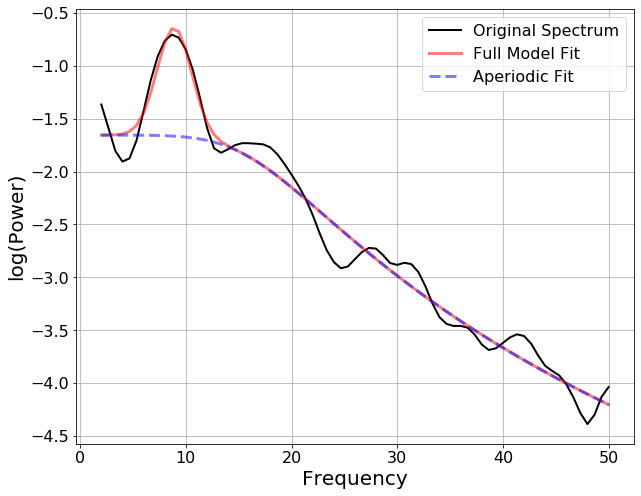

In [12]:
fooof_knee: f.FOOOF = f.FOOOF(peak_width_limits=[1.5, 12], aperiodic_mode="knee")
fooof_knee.add_data(freqs, psd, freq_range=[2, 50])
fooof_knee.fit()
fooof_knee.report()  # gives everything we need, why should we implement ourselves?

#### characteristic time scale

In [13]:
print(1 / (fooof_knee.aperiodic_params_[1] * np.pi * 2))




1.859529953100614e-08
